<a href="https://colab.research.google.com/github/txusser/Master_IA_Sanidad/blob/main/Modulo_2/2_3_4_Proyecto_Arboles_de_decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árboles de decisión
Aplicación en un problema de clasificación con datos referentes a la morfologías y otras características de relevancia clínica en el diagnóstico del cáncer de mama.

## Descripción del proyecto

In [1]:
# Cargamos las librerías necesarias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

from rich import print
from rich.console import Console
console = Console()

sns.set(style="whitegrid") # Configuración de las figuras de Seaborn

# Este dataset está integrados en el conjunto de datos de ejemplo de Scikit-learn
# Referencias: https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset
data = load_breast_cancer()
# El método DESCR nos permite acceder a un docstring con información sobre el conjunto de datos
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radius, field
        10 is Radius SE, field 20 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    📅 November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear 

## Exploración y preprocesado

Número de valores perdidos por variable:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

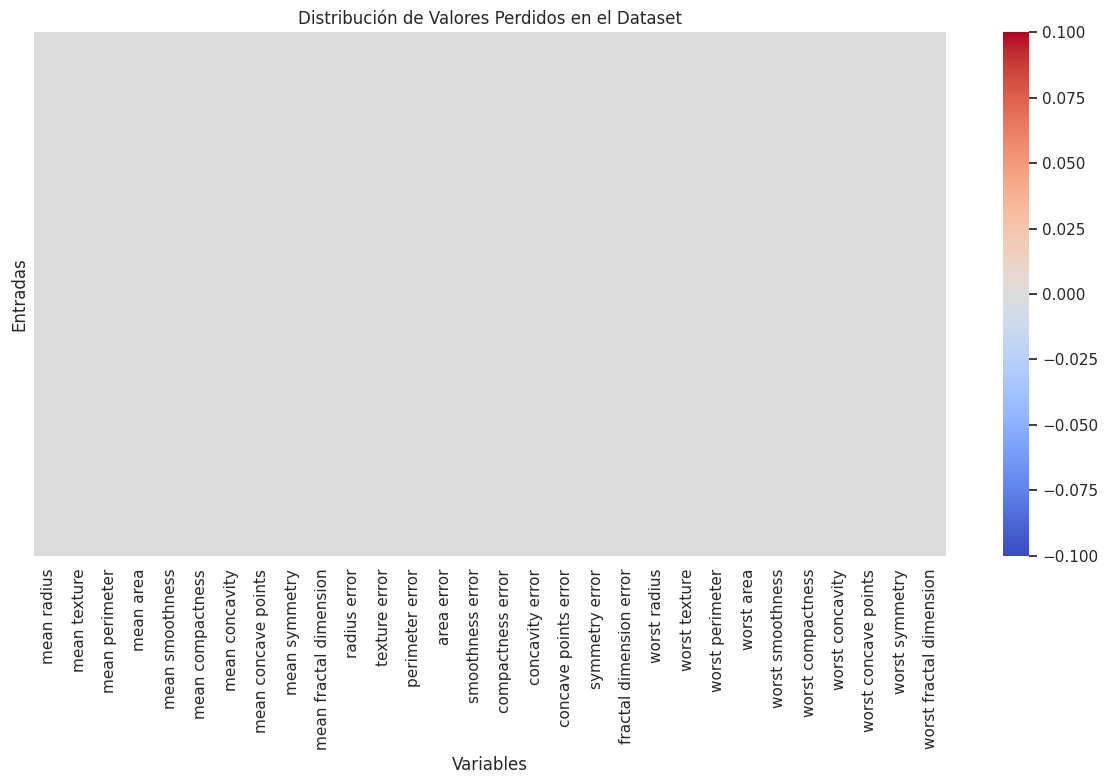

In [2]:
# Creamos un DataFrame de Pandas a partir del diccionario de datos
df = pd.DataFrame(data.data, columns=data.feature_names)

# Comprobemos la presencia de valores perdidos por variable
missing_values = df.isnull().sum()
print("Número de valores perdidos por variable:\n", missing_values)

# También podemos visualizar la distribución de valores perdidos
plt.figure(figsize=(12, 8))  # Ajustamos el tamaño para mejorar la legibilidad
sns.heatmap(df.isnull(), cbar=True, cmap='coolwarm', yticklabels=False)
plt.title("Distribución de Valores Perdidos en el Dataset")
plt.xlabel("Variables")
plt.ylabel("Entradas")
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para evitar la superposición
plt.grid(False)  # Opcional: si prefieres líneas de cuadrícula, cambia a True
plt.tight_layout()  # Ajustar automáticamente los parámetros de la subtrama
plt.show()

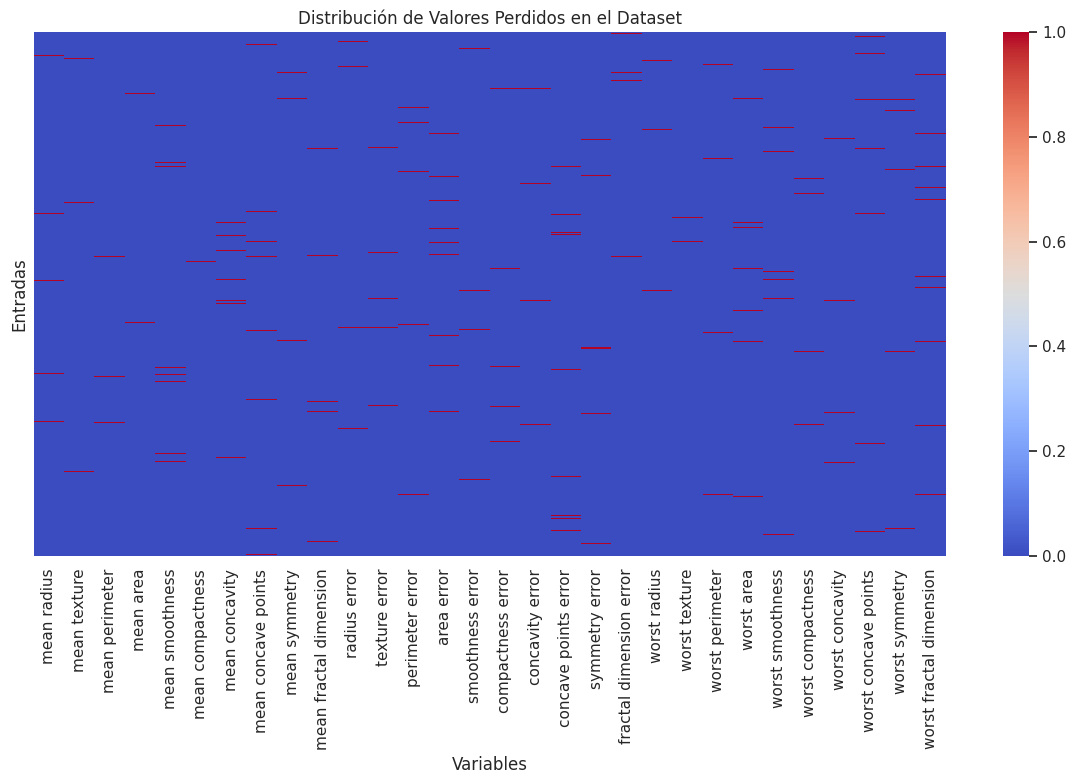

In [3]:
# Función para introducir valores perdidos en un DataFrame
def add_missing_values(df, missing_percentage=0.05):
    # Calcular el número total de celdas en el DataFrame
    total_cells = np.product(df.shape)
    # Calcular el número total de celdas que necesitan ser NaN
    total_missing = int(total_cells * missing_percentage)

    # Obtener los índices de las filas y columnas para las celdas que se convertirán en NaN
    row_indices = np.random.choice(df.shape[0], total_missing)
    col_indices = np.random.choice(df.shape[1], total_missing)

    # Asignar NaN a las celdas seleccionadas
    for row, col in zip(row_indices, col_indices):
        df.iat[row, col] = np.nan


df_missing = df.copy()
add_missing_values(df_missing, missing_percentage=0.01)  # Añadir un 5% de valores perdidos

# Visualizamos los valores perdidos que hemos introducido para probar la visualización
plt.figure(figsize=(12, 8))  # Ajustamos el tamaño para mejorar la legibilidad
sns.heatmap(df_missing.isnull(), cbar=True, cmap='coolwarm', yticklabels=False)
plt.title("Distribución de Valores Perdidos en el Dataset")
plt.xlabel("Variables")
plt.ylabel("Entradas")
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para evitar la superposición
plt.grid(False)  # Opcional: si prefieres líneas de cuadrícula, cambia a True
plt.tight_layout()  # Ajustar automáticamente los parámetros de la subtrama
plt.show()


In [4]:
# El objetivo del proyecto es obtener una buena precisión clasificando
# los ejemplo en el conjunto de prueba en las dos categorías que expresan
# si el tumor es maligno o benigno
print("Clases objetivo:", data.target_names)

Clases objetivo: ['malignant' 'benign']

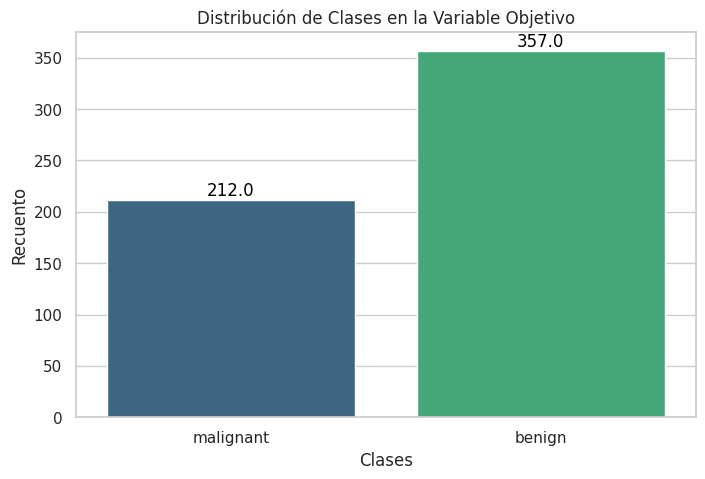

In [5]:
# Separamos los conjuntos de datos en características y variable objetivo
X, y = data.data, data.target

# Veámos en un gráfico cuantas instancias tenemos de cada clase
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(x=y, ax=ax, palette="viridis")  # Usando una paleta de colores 'viridis'
ax.set_title("Distribución de Clases en la Variable Objetivo")
ax.set_xlabel("Clases")
ax.set_ylabel("Recuento")
ax.set_xticklabels(data.target_names)

# Mostrar las etiquetas de datos en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center', va='bottom', color='black')



## Balance de clases

Conteo de clases: [212 357]

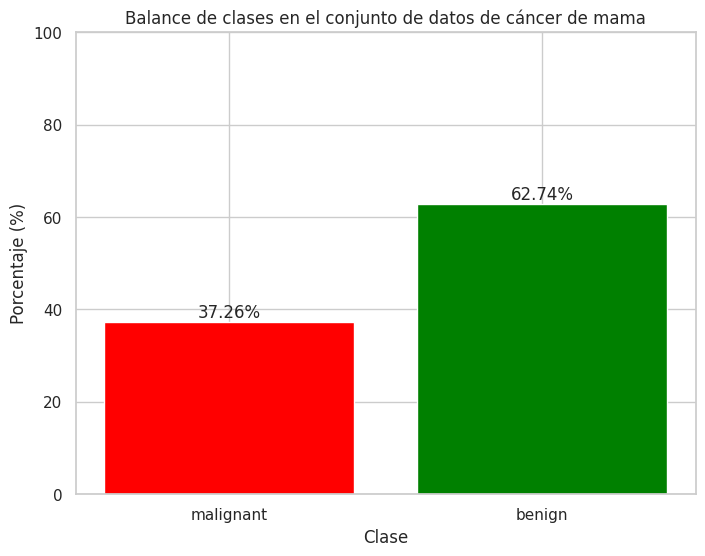

In [6]:
labels = data.target

# Contar el número de instancias por clase
class_counts = np.bincount(labels)
class_counts, class_counts / len(labels) * 100
class_labels = data.target_names
class_percentages = class_counts / len(labels) * 100

print("Conteo de clases:", class_counts)

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(class_labels, class_percentages, color=['red', 'green'])

# Añadir título y etiquetas a los ejes
plt.title('Balance de clases en el conjunto de datos de cáncer de mama')
plt.xlabel('Clase')
plt.ylabel('Porcentaje (%)')
plt.ylim(0, 100)  # Establecer límites para el eje y para mejor claridad

# Mostrar los porcentajes en las barras
for i, percentage in enumerate(class_percentages):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center')





**Conclusiones**: El conjunto de datos muestra un desbalance relativo, con una mayor proporción de muestras clasificadas como ausencia de cáncer (clase 1) en comparación con la presencia de cáncer (clase 0). No obstante, la diferencia no es extrema. Con alrededor de un 37% de casos positivos y un 63% de negativos, las técnicas de aprendizaje automático estándar podrían manejar este desbalance sin ajustes específicos.

Para algoritmos sensibles al desbalance de clases o en contextos donde la clasificación errónea de una clase tiene consecuencias significativamente más graves, se podrían considerar estrategias para equilibrar la distribución. Estas estrategias incluyen sobremuestreo de la clase minoritaria, submuestreo de la clase mayoritaria o la aplicación de métodos de generación de datos sintéticos como SMOTE.

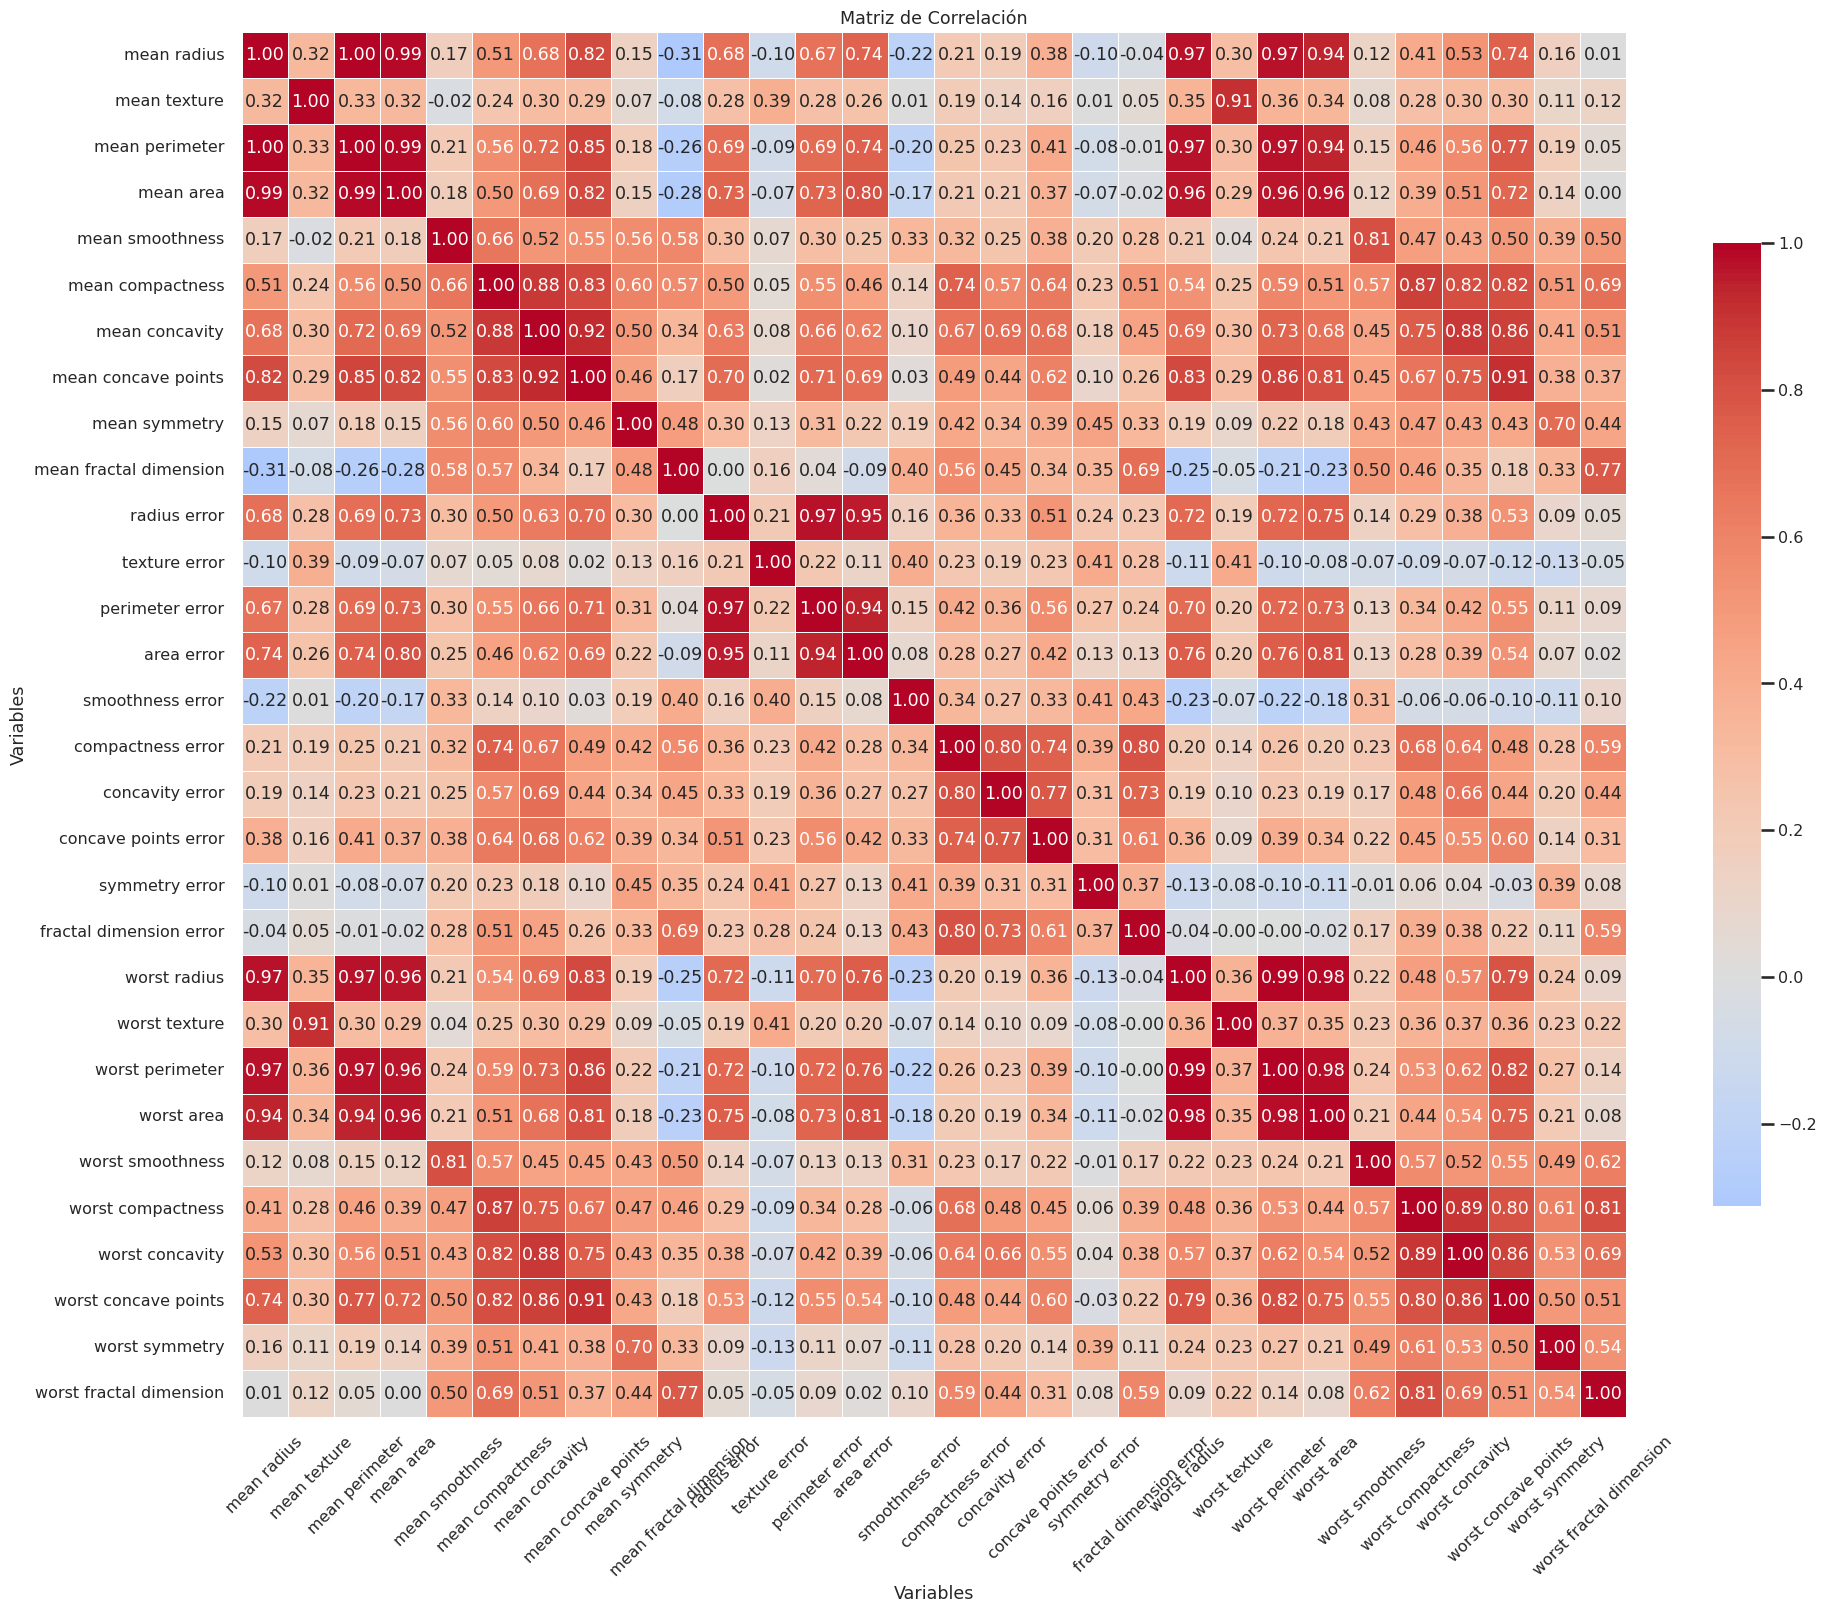

In [7]:
# Aumentar el tamaño de la fuente
sns.set_context('talk', font_scale=0.7)

# Crear una figura para visualizar la matriz de correlación con un tamaño ajustado
plt.figure(figsize=(20, 20))  # Ajustar el tamaño de la figura

# Generar un mapa de calor de la matriz de correlación
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Configuramos títulos y etiquetas de los ejes
plt.title('Matriz de Correlación')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Rotar las etiquetas del eje x y mejorar la disposición de la figura
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()  # Ajustar automáticamente los parámetros de la subtrama


In [8]:
# En el gráfico anterior podemos comprobar que hay varias variables que presentan
# una correlación alta, vamos a ver cómo podemos descartarlas

# Implementamos una función que cree una lista con las columnas cuyo índice
# de correlación es inferior a cierto umbral (thres)
def find_lc_cols(df, thres):
  """
  Encuentra las variables con una correlación mayor que el umbral (thres)
  """
  corr = df.corr()
  columns = np.full((corr.shape[0],), True, dtype=bool)
  for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
      if abs(corr.iloc[i,j]) >= thres:
        if columns[j]: columns[j] = False

  return columns

# Ejecutamos la función y recuperamos las columnas/variables con baja correlación
lc_cols = find_lc_cols(df, thres=0.90)
print("Variable/s con baja (<90%) correlación:", df.columns[lc_cols].tolist())

Variable/s con baja (<90%) correlación:
[
    'mean radius',
    'mean texture',
    'mean smoothness',
    'mean compactness',
    'mean concavity',
    'mean symmetry',
    'mean fractal dimension',
    'radius error',
    'texture error',
    'smoothness error',
    'compactness error',
    'concavity error',
    'concave points error',
    'symmetry error',
    'fractal dimension error',
    'worst smoothness',
    'worst compactness',
    'worst concavity',
    'worst symmetry',
    'worst fractal dimension'
]

In [9]:
# Construimos un Dataframe que sólo incluya las columnas seleccionadas
s_cols = df.columns[lc_cols]
df_s = df[s_cols]
console.log(f"Variables seleccionadas: {len(df_s.columns)}", style="bold blue")
console.log(f"De un total de: {len(df.columns)}", style="bold blue")
console.log(f"\nDataset final: {df_s}", style="yellow")

[17:31:34] Variables seleccionadas: 20                                             <ipython-input-9-562784f24eba>:4

           De un total de: 30                                                      <ipython-input-9-562784f24eba>:5

[17:31:35]                                                                         <ipython-input-9-562784f24eba>:6
           Dataset final:      mean radius  mean texture  mean smoothness  mean                                    
           compactness  \                                                                                          
           0          17.99         10.38          0.11840           0.27760                                       
           1          20.57         17.77          0.08474           0.07864                                       
           2          19.69         21.25          0.10960           0.15990                                       
           3          11.42         20.38          0.14250           0.28390                                       
           4          20.29         14.34          0.10030           0.13280                                       
           ..           ...           ...              ...               ...                                       
           564        21.56         22.39          0.11100           0.11590                                       
           565        20.13         28.25          0.09780           0.10340                                       
           566        16.60         28.08          0.08455           0.10230                                       
           567        20.60         29.33          0.11780           0.27700                                       
           568         7.76         24.54          0.05263           0.04362                                       
                                                                                                                   
                mean concavity  mean symmetry  mean fractal dimension  radius                                      
           error  \                                                                                                
           0           0.30010         0.2419                 0.07871                                              
           1.0950                                                                                                  
           1           0.08690         0.1812                 0.05667                                              
           0.5435                                                                                                  
           2           0.19740         0.2069                 0.05999                                              
           0.7456                                                                                                  
           3           0.24140         0.2597                 0.09744                                              
           0.4956                                                                                                  
           4           0.19800         0.1809                 0.05883                                              
           0.7572                                                                                                  
           ..              ...            ...                     ...                                              
           ...                                                                                                     
           564         0.24390         0.1726                 0.05623                                              
           1.1760                                                                                                  
           565         0.14400         0.1752                 0.05533                                              
           0.7655                                                                                                  
           566         0.09251         0.1590                 0.05648                                              
           0.4564                                       

- X_train:
(455, 20)

- X_test:
(114, 20)

- y_train:
(455,)

- y_test:
(114,)

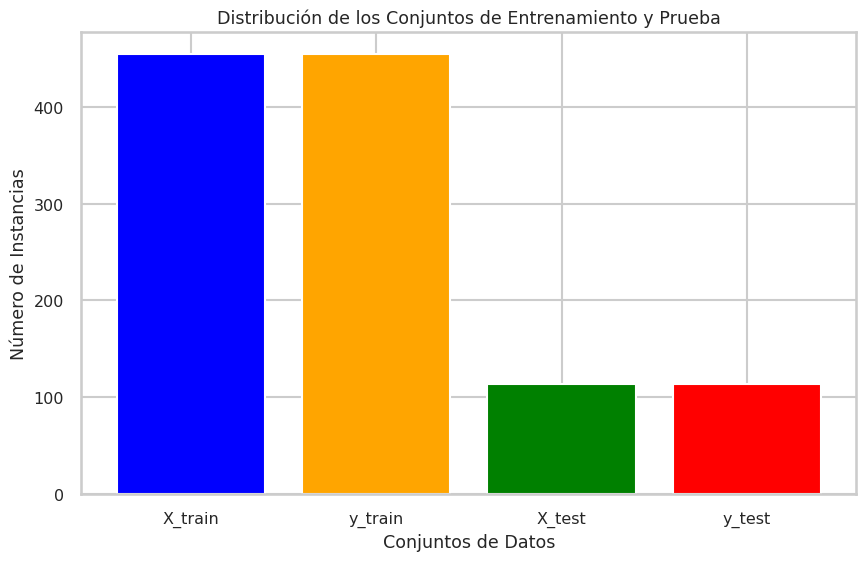

In [10]:
# Tras depurar nuestro dataset podemos proceder a crear los conjuntos de
# entrenamiento y prueba

# Usaremos la función de Scikit-learn para configurar los conjuntos de entrenamiento
# y prueba
from sklearn.model_selection import train_test_split
X = df_s[df_s.columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Veámos cuál es la forma de estos arrays
print(" - X_train:", X_train.shape)
print(" - X_test:", X_test.shape)
print(" - y_train:", y_train.shape)
print(" - y_test:", y_test.shape)

# Crear un gráfico de barras para mostrar el número de instancias
shapes = {
    'X_train': X_train.shape[0],
    'y_train': y_train.shape[0],
    'X_test': X_test.shape[0],
    'y_test': y_test.shape[0]
}
plt.figure(figsize=(10, 6))
plt.bar(shapes.keys(), shapes.values(), color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Conjuntos de Datos')
plt.ylabel('Número de Instancias')
plt.title('Distribución de los Conjuntos de Entrenamiento y Prueba')
plt.show()

## Árbol de decisión


In [11]:
# Es hora de configurar nuestro clasificador y ajustar el modelo a los datos
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(criterion='gini', max_depth=2)
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [12]:
# Ajustado el modelo vamos a evaluar su desempeño
# Calculamos las predicciones del modelo entrenado sobre el conjunto de prueba
y_test_pred = clf_dt.predict(X_test)
# Utilizando las etiquetas verdaderas en el conjunto de pruba, calculamos la
# precisión del modelo
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_test_pred) * 100
print("La precisión del modelo es de: {:0.2f}".format(acc))

La precisión del modelo es de: 91.23

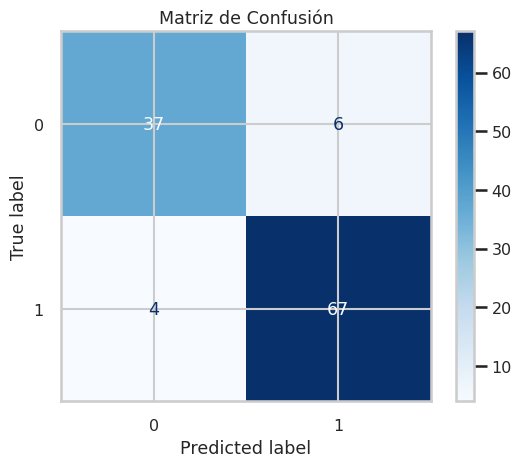

In [13]:
# Veámos ahora la matriz de confusión para obtener una mejor valoración del
# desempeño. Recuerda que en el conjunto de prueba tenemos 114 sujetos
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_test_pred)

# Crear una instancia de ConfusionMatrixDisplay para visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Configurar el título y mostrar la matriz de confusión
disp.plot(cmap='Blues', values_format='d')
plt.title("Matriz de Confusión")
plt.show()


<Figure size 800x800 with 0 Axes>

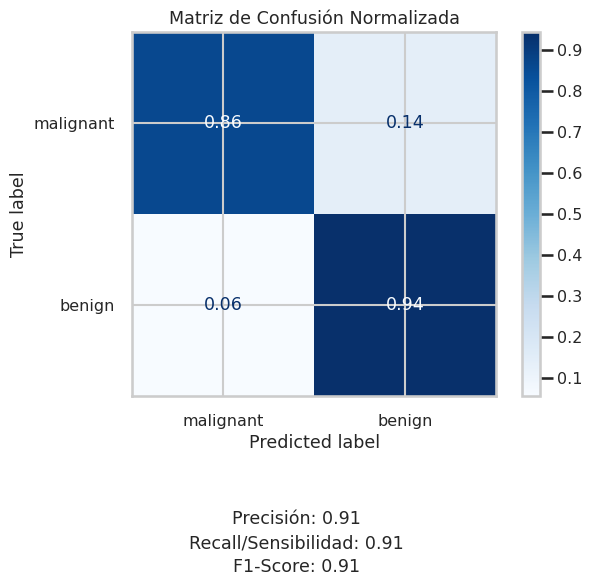

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

# Suponiendo que `y_test` es tu conjunto de etiquetas verdaderas y `y_test_pred` son las predicciones del modelo

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_test_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalización de la matriz de confusión

# Calcular métricas adicionales
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

# Crear una instancia de ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=data.target_names)

# Configurar y mostrar la matriz de confusión normalizada
plt.figure(figsize=(8, 8))
disp.plot(cmap='Blues', values_format='.2f')
plt.title('Matriz de Confusión Normalizada')

# Anotar métricas adicionales
plt.figtext(0.5, -0.1, f'Precisión: {precision:.2f}', ha='center', va='center')
plt.figtext(0.5, -0.15, f'Recall/Sensibilidad: {recall:.2f}', ha='center', va='center')
plt.figtext(0.5, -0.2, f'F1-Score: {f1:.2f}', ha='center', va='center')

plt.tight_layout()  # Ajustar automáticamente los parámetros de la subtrama
plt.show()


## Resultados
Los resultados obtenidos resaltan la solidez de nuestro modelo, demostrando una precisión de clasificación superior al 91%. Además, logra identificar de manera precisa 67 casos malignos y 37 casos benignos. Aunque destaca por su rendimiento, se han registrado 6 falsos positivos y 4 falsos negativos, lo que nos ofrece valiosa información sobre áreas que podrían ser afinadas para optimizar aún más su eficacia.

## Aplicar Modelo de Regresión Logística
Veámos qué tal lo hace un modelo de regresión logística

https://www.kaggle.com/neisha/heart-disease-prediction-using-logistic-regression


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Crear y ajustar el modelo de Regresión Logística
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_test_pred = clf_lr.predict(X_test)

# Calcular y mostrar la precisión del modelo
accuracy = accuracy_score(y_test, y_test_pred) * 100
print("La precisión del modelo (Regresión Logística) es: {:.2f}%".format(accuracy))


La precisión del modelo (Regresión Logística) es: 95.61%

## Curva ROC
La curva ROC (Receiver Operating Characteristic) es una herramienta gráfica utilizada en la evaluación de modelos de clasificación. Proporciona una representación visual de cómo un modelo es capaz de discriminar entre dos clases distintas al variar el umbral de decisión.

Se crea trazando la tasa de verdaderos positivos (Sensibilidad) en el eje y y la tasa de falsos positivos (1 - Especificidad) en el eje x. Aquí hay una explicación de los términos involucrados:

- **Sensibilidad (True Positive Rate - TPR):** Mide la proporción de instancias positivas que el modelo clasifica correctamente como positivas. Se calcula como TP / (TP + FN), donde TP son los verdaderos positivos (instancias positivas clasificadas correctamente) y FN son los falsos negativos (instancias positivas clasificadas incorrectamente como negativas).

- **Especificidad (True Negative Rate - TNR):** Mide la proporción de instancias negativas que el modelo clasifica correctamente como negativas. Se calcula como TN / (TN + FP), donde TN son los verdaderos negativos (instancias negativas clasificadas correctamente) y FP son los falsos positivos (instancias negativas clasificadas incorrectamente como positivas).

En la curva ROC, cada punto en la curva representa un umbral de decisión diferente, lo que afecta la tasa de verdaderos positivos y la tasa de falsos positivos. Un modelo ideal tendría una curva ROC que alcance el rincón superior izquierdo (sensibilidad 1, especificidad 1), lo que significa que no hay falsos positivos y todos los verdaderos positivos se clasifican correctamente.

El área bajo la curva ROC (AUC) es también una métrica importante. Mide la capacidad global de discriminación del modelo en todas las posibles decisiones de umbral. Un AUC cercano a 1 indica un modelo con un buen poder discriminativo, mientras que un AUC cercano a 0.5 sugiere un rendimiento similar al azar.

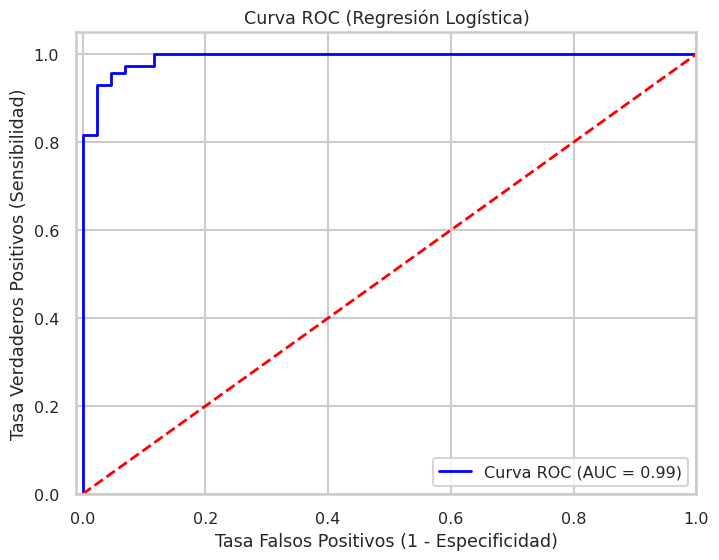

In [16]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculamos los valores de probabilidad asignados por el modelo sobre el conjunto de prueba
y_score = clf_lr.predict_proba(X_test)[:,1]

# Calculamos la tasa de falsos positivos y verdaderos positivos
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Calcular el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Crear la figura para visualizar la curva ROC
plt.figure(figsize=(8, 6))

# Graficar la curva ROC
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')

# Configurar los límites y etiquetas de los ejes, y agregar una leyenda
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Curva ROC (Regresión Logística)')
plt.xlabel('Tasa Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa Verdaderos Positivos (Sensibilidad)')
plt.legend(loc='lower right')
plt.grid(True)

## Otros modelos útiles para problemas de Clasificación

In [17]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Inicializar los modelos
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}

# Entrenar y evaluar cada modelo
for name, model in models.items():
    model.fit(X_train, y_train)  # Entrenar el modelo
    y_pred = model.predict(X_test)  # Predecir en el conjunto de prueba
    console.rule(f"[bold]Modelo {name} [bold]")
    print(classification_report(y_test, y_pred))  # Mostrar métricas de rendimiento


─────────────────────────────────────────── Modelo Logistic Regression  ───────────────────────────────────────────

precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

─────────────────────────────────────────────────── Modelo SVM  ───────────────────────────────────────────────────

precision    recall  f1-score   support

           0       0.92      0.84      0.88        43
           1       0.91      0.96      0.93        71

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114

────────────────────────────────────────────── Modelo Decision Tree  ──────────────────────────────────────────────

precision    recall  f1-score   support

           0       0.88      0.86      0.87        43
           1       0.92      0.93      0.92        71

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114

────────────────────────────────────────────── Modelo Random Forest  ──────────────────────────────────────────────

precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

─────────────────────────────────────────────────── Modelo KNN  ───────────────────────────────────────────────────

precision    recall  f1-score   support

           0       0.93      0.86      0.89        43
           1       0.92      0.96      0.94        71

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114

## Comentarios sobre los resultados

Analizamos las métricas de desempeño del modelo basado en Bosques Alatorios (RandomForest)
* Clase 0: tumor maligno
* Clase 1: tumor benigno

### Precisión (Precision)
- **Clase 0**: 0.95. Esto significa que el 95% de las veces que el modelo predice la clase 0, es correcto.
- **Clase 1**: 0.96. El 96% de las veces que el modelo predice la clase 1, es correcto.
- La alta precisión en ambas clases sugiere que el modelo es bueno en minimizar los falsos positivos.

### Recall (Sensibilidad)
- **Clase 0**: 0.93. De todas las instancias reales de la clase 0, el modelo las identifica correctamente el 93% de las veces.
- **Clase 1**: 0.97. El modelo identifica correctamente el 97% de todas las instancias reales de la clase 1.
- El recall alto indica que el modelo es bueno en identificar las clases positivas.

### F1-Score
- **Clase 0**: 0.94. Es un balance entre la precisión y el recall para la clase 0.
- **Clase 1**: 0.97. Es un balance entre la precisión y el recall para la clase 1.
- F1-Score es especialmente útil en situaciones donde un equilibrio entre precisión y recall es importante. Un valor alto en ambas clases indica un buen equilibrio.

### Soporte
- **Clase 0**: 43. Hay 43 instancias de la clase 0 en el conjunto de datos.
- **Clase 1**: 71. Hay 71 instancias de la clase 1.
- El soporte indica el número de ocurrencias reales de cada clase en el conjunto de datos utilizado para la prueba.

### Accuracy (Precisión Total)
- 0.96. El modelo clasificó correctamente el 96% de todas las instancias.

### Macro Avg y Weighted Avg
- **Macro Avg**: Calcula la media aritmética de las métricas para cada clase, tratando todas las clases por igual. Para este modelo, las medias macro de precisión, recall y f1-score son 0.96, 0.95 y 0.95 respectivamente.
- **Weighted Avg**: Calcula la media ponderada de las métricas teniendo en cuenta el soporte (número de instancias) para cada clase. Las medias ponderadas para precisión, recall y f1-score son 0.96.

### Interpretación General
El modelo muestra un alto rendimiento en todas las métricas para ambas clases, lo que indica que es eficaz tanto en la identificación correcta de las clases (alto recall) como en la minimización de falsos positivos (alta precisión). El f1-score elevado en ambas clases sugiere un buen equilibrio entre precisión y recall. La precisión total (accuracy) también es alta, lo que significa que el modelo es muy eficiente en clasificar correctamente las instancias en general. Sin embargo, siempre es importante considerar el contexto de aplicación del modelo, ya que en algunos casos, el costo de los falsos positivos o falsos negativos puede ser crítico y requerir un enfoque más matizado que el que sugiere una alta precisión general.